In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm

from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

## 1) Data Wrangling

In [2]:
df = pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df=df.drop(['Id'], axis=1)
df['quality'] = df['quality']-3

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [6]:
df.shape[0]

1143

In [7]:
df.shape[1]

12

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df['quality'].nunique()

6

In [10]:
df['quality'].unique()

array([2, 3, 4, 1, 5, 0], dtype=int64)

In [11]:
df['quality'].value_counts()/len(df)

quality
2    0.422572
3    0.404199
4    0.125109
1    0.028871
5    0.013998
0    0.005249
Name: count, dtype: float64

In [12]:
#df.describe()[1:].T.style.background_gradient(cmap='Blues')
df.describe()[1:].T

,mean,std,min,25%,50%,75%,max
fixed acidity,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


## 2) Data Visualization

In [13]:
df_category=df.copy()
df_category=df_category.sort_values(by='quality', ascending=True)

In [14]:
df_category["Quality Category"]=df_category["quality"]
df_category["Quality Category"].replace({0: "Terrible", 1: "Very Poor", 2: "Poor", 3: "Good", 4: "Very Good", 5: "Excellent"}, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20880\3425236563.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_category["Quality Category"].replace({0: "Terrible", 1: "Very Poor", 2: "Poor", 3: "Good", 4: "Very Good", 5: "Excellent"}, inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_20880\3781976004.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax[1] = sns.countplot(x="Quality Category", data=df_category, palette=['#EBEDEF','#85929E', '#34495E', '#566573', '#5D6D7E','#AEB6BF'])


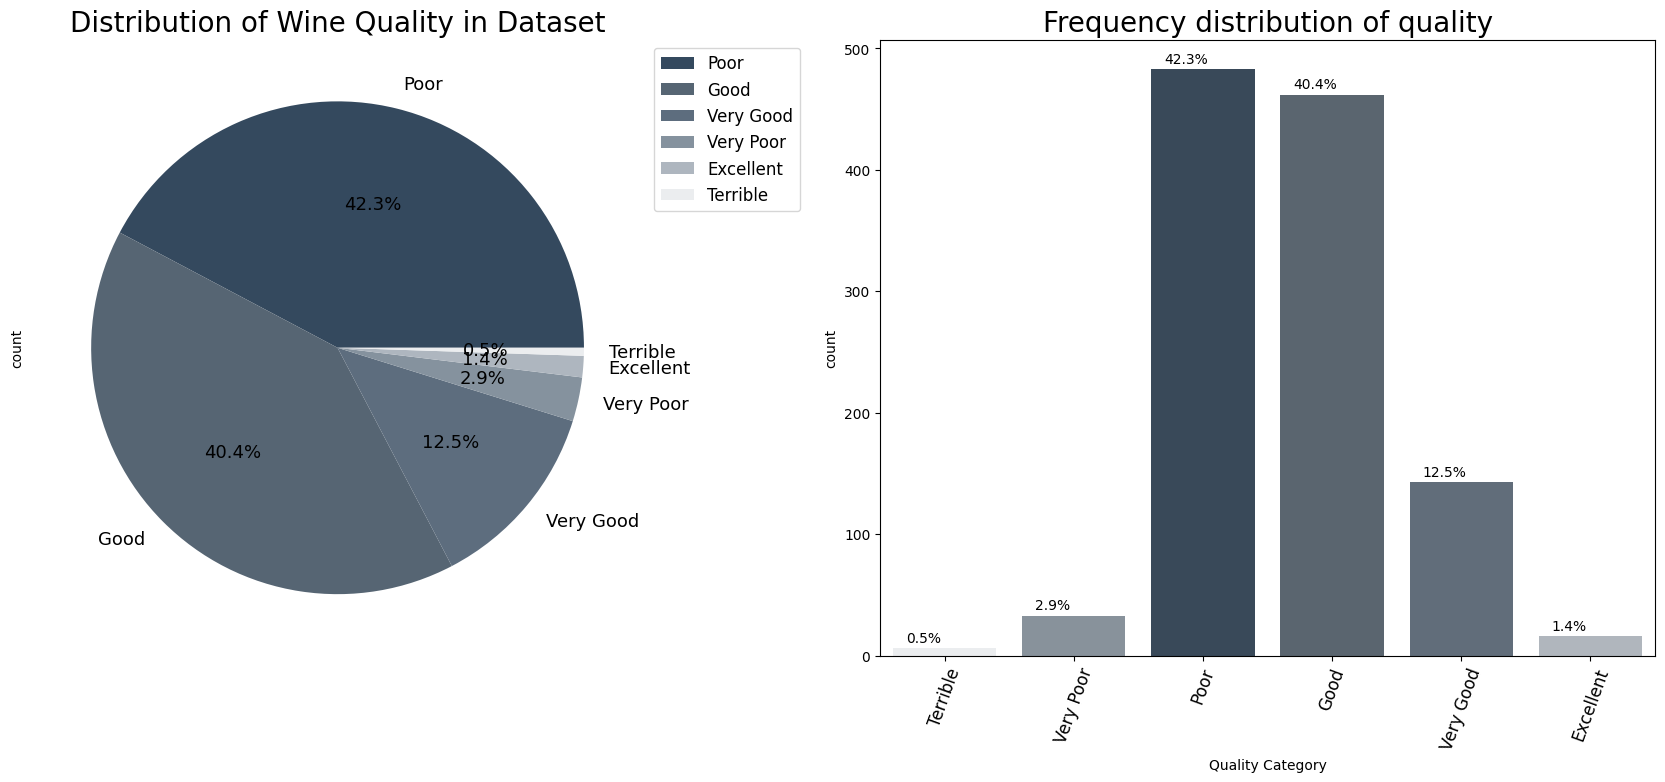

In [15]:
# visualize frequency distribution of quality

f,ax=plt.subplots(1,2,figsize=(22,8))

ax[0] = df_category["Quality Category"].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], fontsize=13, colors = ['#34495E','#566573', '#5D6D7E', '#85929E', '#AEB6BF','#EBEDEF'])
ax[0].set_title("Distribution of Wine Quality in Dataset", fontsize=20)
ax[0].legend(bbox_to_anchor=(1, 1), fontsize=12)



#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Quality Category", data=df_category, palette=['#EBEDEF','#85929E', '#34495E', '#566573', '#5D6D7E','#AEB6BF'])
ax[1].set_title("Frequency distribution of quality", fontsize=20)

for p in ax[1].patches:
    ax[1].annotate('{:.1f}%'.format(100*p.get_height()/len(df_category['Quality Category'])), (p.get_x()+0.1, p.get_height()+5))

plt.xticks(rotation=70, fontsize=12)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":20,"axes.labelsize":14})   

plt.show()

In [16]:
quality_table={}

In [17]:
quality_table['Values']=[0,1,2,3,4,5]

In [18]:
df_comparison = pd.DataFrame.from_dict(quality_table).T
df_comparison.columns = ['Terrible', 'Very Poor', 'Poor', 'Good', 'Very Good', 'Excellent']

df_comparison.style.background_gradient(cmap='Blues')

,Terrible,Very Poor,Poor,Good,Very Good,Excellent
Values,0,1,2,3,4,5


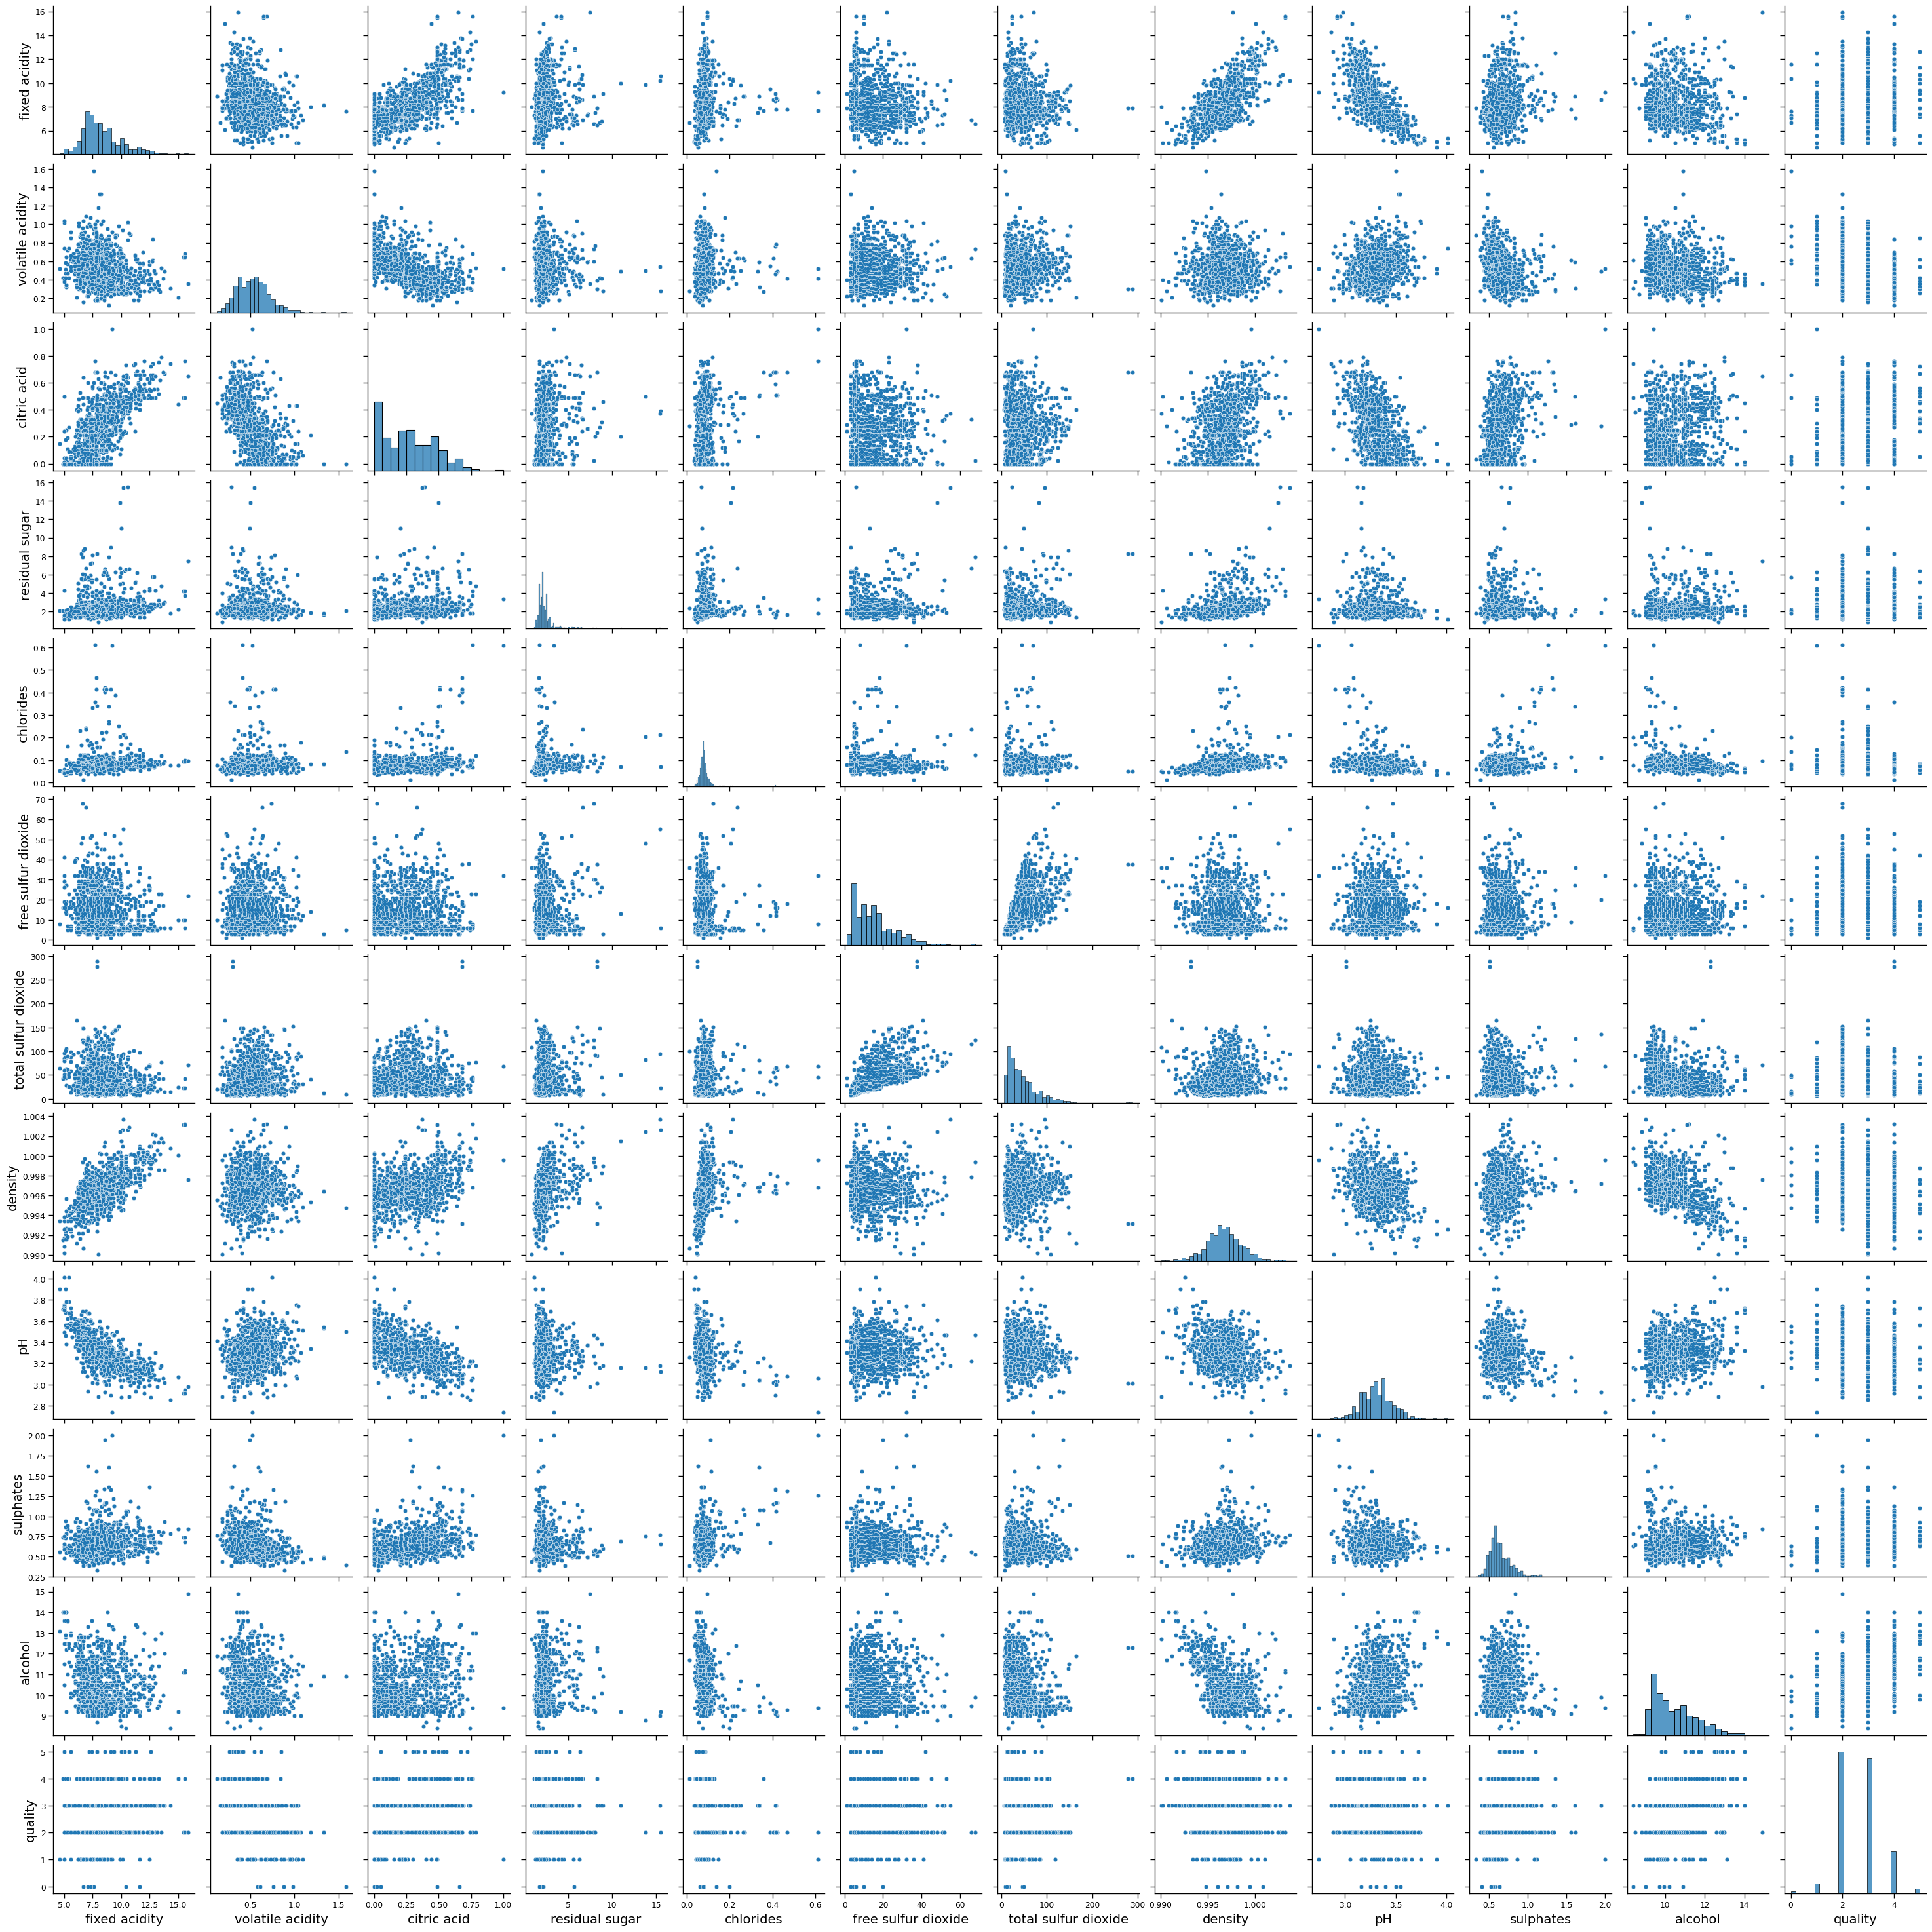

In [19]:
sns.pairplot(df)
plt.show()

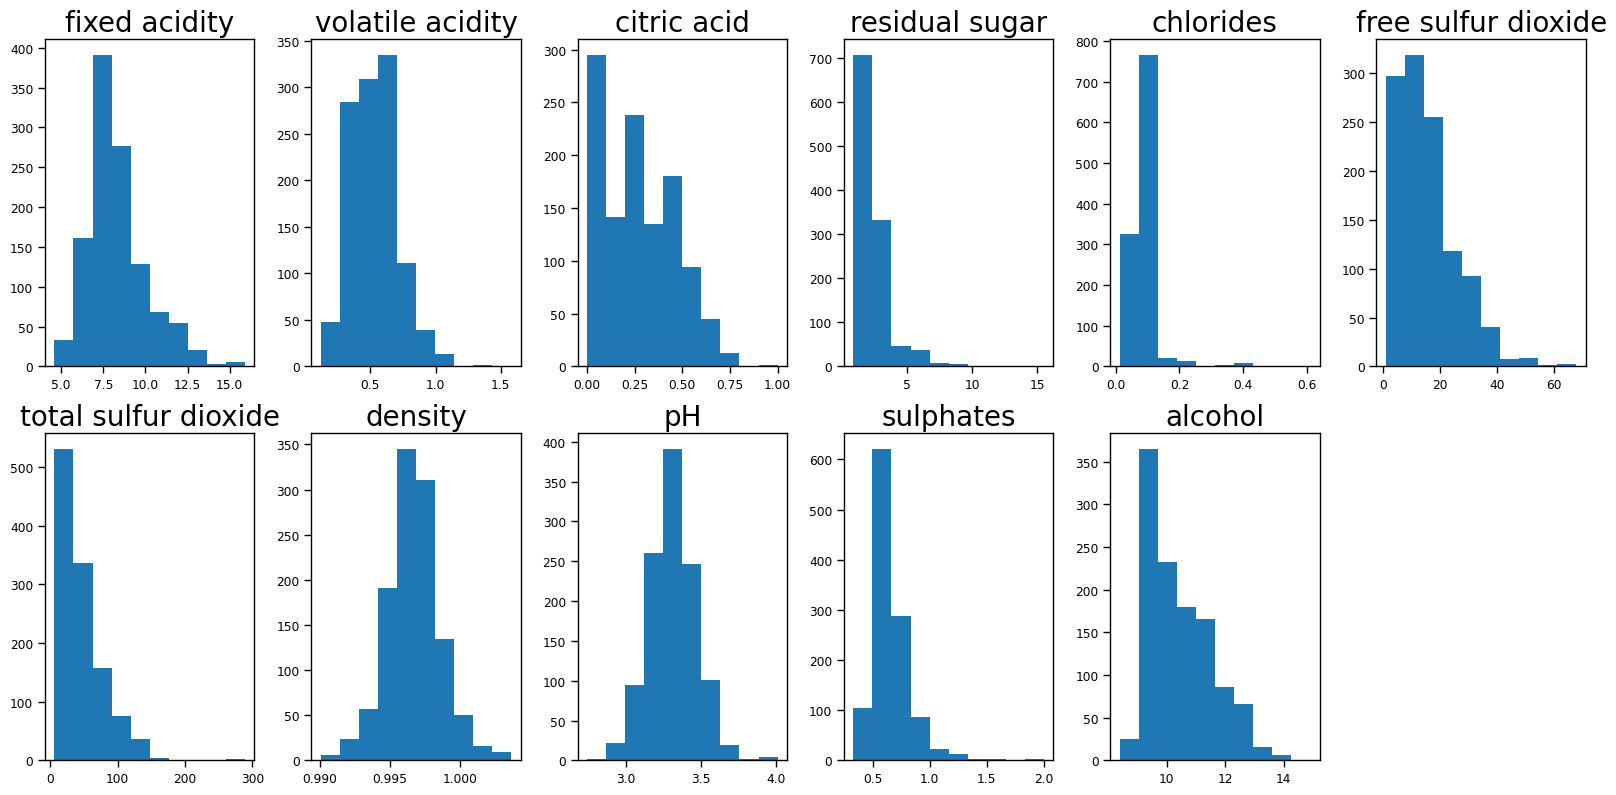

In [20]:
fig = plt.figure(figsize=(16,8))

gs1 = gridspec.GridSpec(2, 6)
axs = []
for c, num in zip(df.columns, range(1,12)):
    axs.append(fig.add_subplot(gs1[num - 1]))
    axs[-1].hist(df[c])
    plt.title(c)

    
plt.tight_layout()
plt.show()

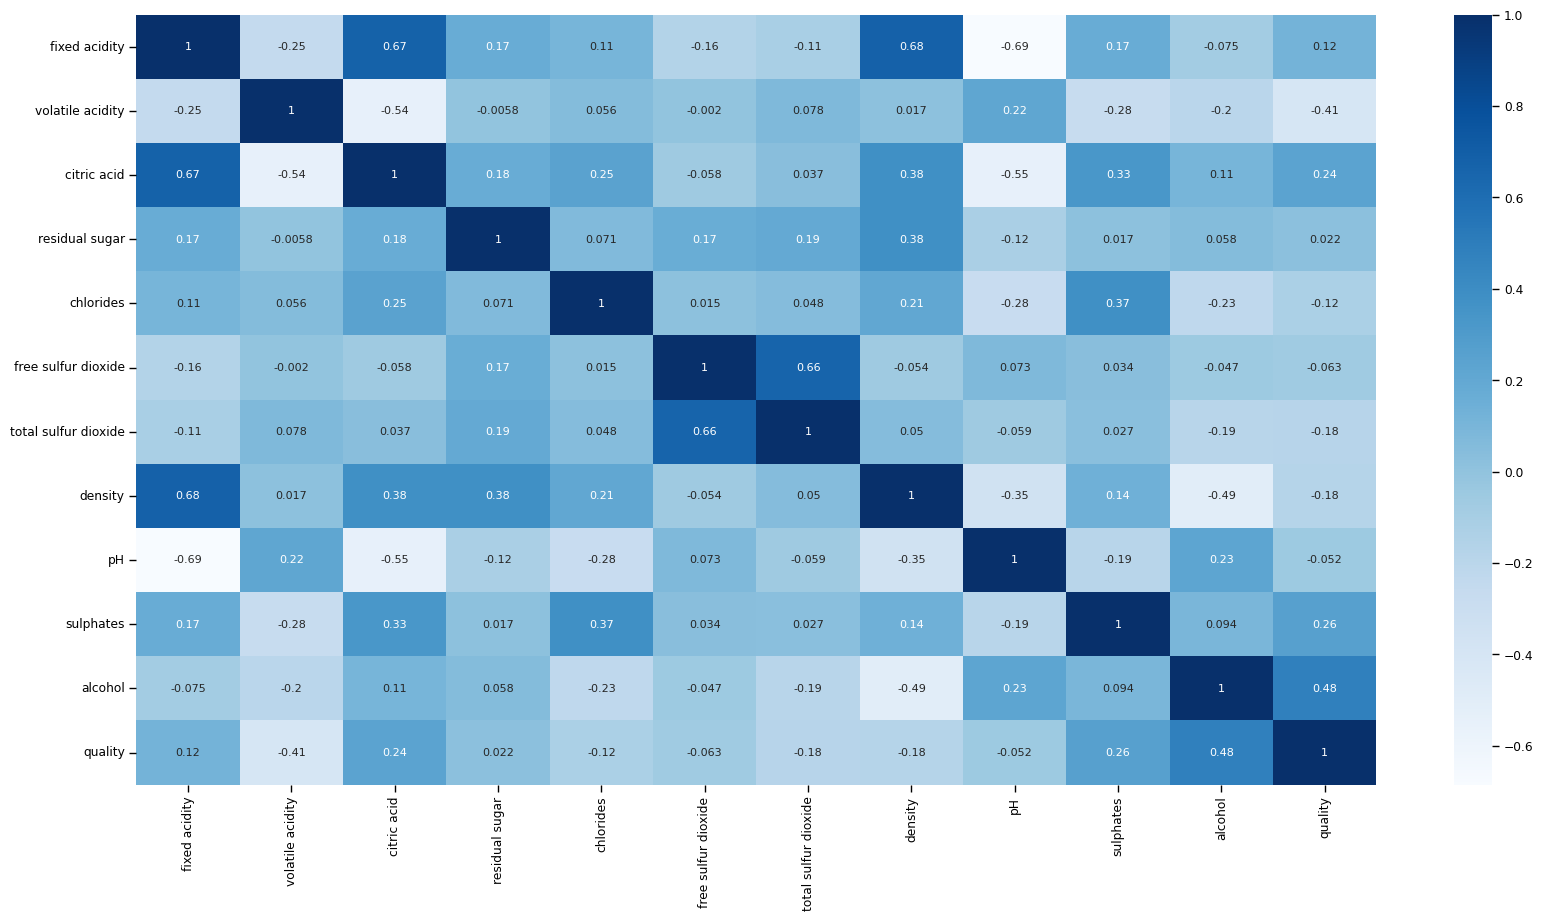

In [21]:
plt.figure(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

In [22]:
plt.figure(figsize=(15,8))
df_corr_bar = abs(df.corr()['quality']).sort_values()[:-1]
sns.barplot(df_corr_bar.index,df_corr_bar.values,palette="Blues_d").set_title('Feature Correlation Distribution According to Quality', fontsize=20)
plt.xticks(rotation=70, fontsize=14)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1500x800 with 0 Axes>